In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

df = pd.read_excel(r"C:\Users\tapir\OneDrive\Desktop\temperature_ice_cream_sales.xlsx", engine="openpyxl")

print(df.head())

   Day  Temperature (°C)  Ice Cream Sales (USD)   Sales %
0  114              34.3                 495.20  0.012642
1   60              26.9                 484.77  0.012376
2   90              24.6                 484.08  0.012358
3   32              31.3                 479.31  0.012236
4  107              31.4                 473.39  0.012085
Null values check:
 Day                      0
Temperature (°C)         0
Ice Cream Sales (USD)    0
Sales %                  0
dtype: int64


In [67]:
null_check = df.isnull().sum()
print("Null values check:\n", null_check)

data_points = len(df)
print(f"\nTotal data points: {data_points}")

Null values check:
 Day                      0
Temperature (°C)         0
Ice Cream Sales (USD)    0
Sales %                  0
dtype: int64

Total data points: 120


In [81]:
temperatures = df['Temperature (°C)'].values
sales = df['Ice Cream Sales (USD)'].values

# 1. Calculate mean temperature
mean_temp = np.mean(temperatures)
# 2. Calculate sales standard deviation
sales_std = np.std(sales)
# 3. Find max temperature
max_temp = np.max(temperatures)
# 4. Find min sales
min_sales = np.min(sales)
# 5. Calculate sum of all sales
total_sales = np.sum(sales)

print(f"\nNumPy Results:\nMean Temp: {mean_temp:.2f}°C\nSales STD: ${sales_std:.2f}"
      f"\nMax Temp: {max_temp}°C\nMin Sales: ${min_sales}\nTotal Sales: ${total_sales:.2f}")

t_stat, p_value = stats.ttest_ind(temperatures, sales)
print(f"\nSciPy t-test:\nt-statistic: {t_stat:.4f}\np-value: {p_value:.4f}")

X = sm.add_constant(temperatures)
model = sm.OLS(sales, X)
results = model.fit()
print("\nStatsmodels Regression Results:")
print(results.summary())


NumPy Results:
Mean Temp: 21.62°C
Sales STD: $77.80
Max Temp: 34.3°C
Min Sales: $146.64
Total Sales: $39171.68

SciPy t-test:
t-statistic: -42.6662
p-value: 0.0000

Statsmodels Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     671.5
Date:                Wed, 21 May 2025   Prob (F-statistic):           1.58e-50
Time:                        00:52:33   Log-Likelihood:                -578.73
No. Observations:                 120   AIC:                             1161.
Df Residuals:                     118   BIC:                             1167.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
            

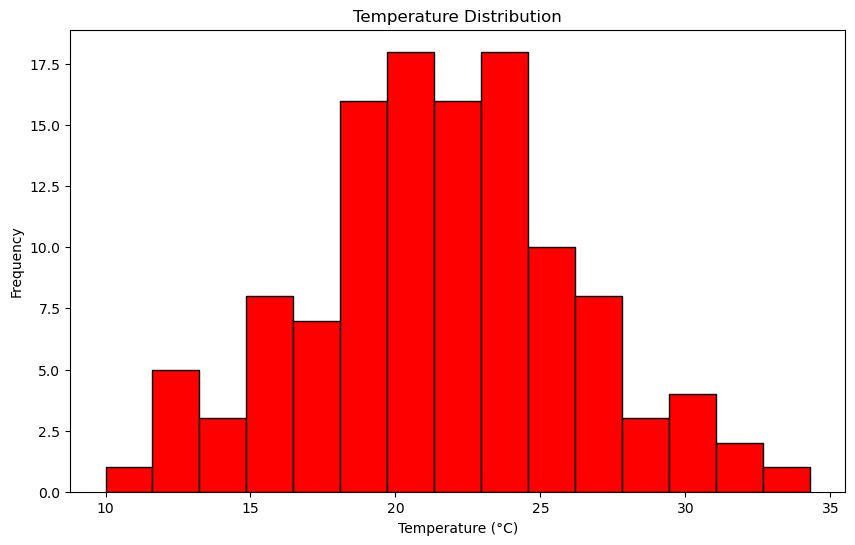

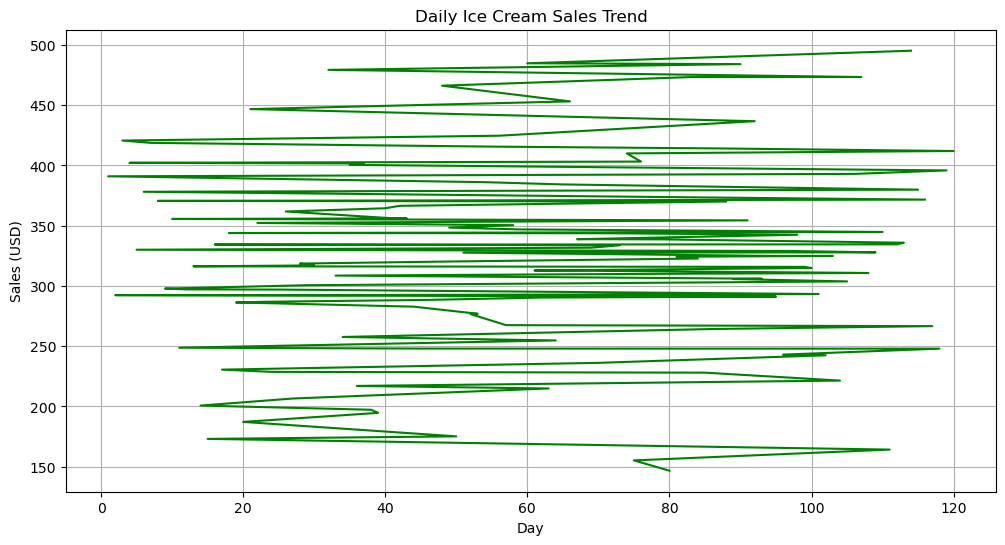

In [95]:
# Visualization 1: Temperature Distribution
plt.figure(figsize=(10, 6))
plt.hist(temperatures, bins=15, color='red', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Daily Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], sales, color='green')
plt.title('Daily Ice Cream Sales Trend')
plt.xlabel('Day')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show()

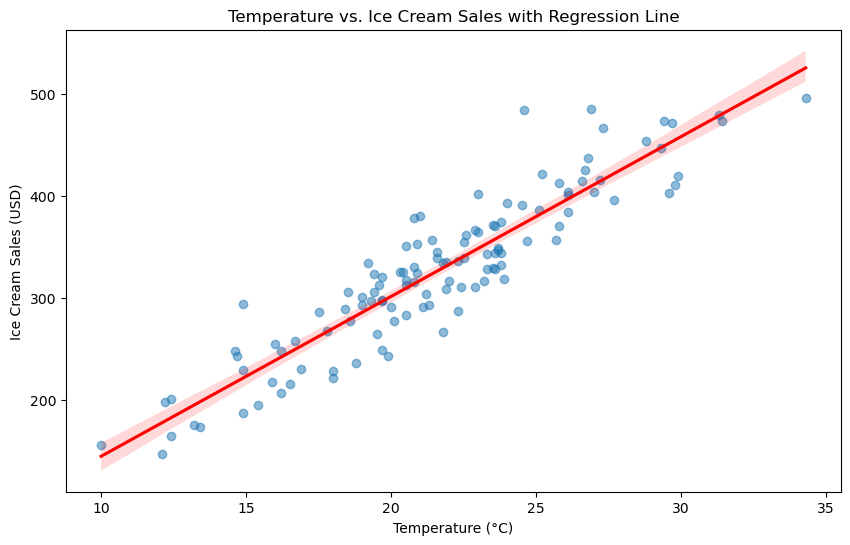